In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
train_df = pd.read_csv('train.csv')

# 2. Handle missing values
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        mode_val = train_df[col].mode()[0]
        train_df[col] = train_df[col].fillna(mode_val)
    else:
        median_val = train_df[col].median()
        train_df[col] = train_df[col].fillna(median_val)

In [15]:
# 3. Encoding data kategorikal
cat_cols = train_df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col])

# 4. Pilih fitur numerik yang korelasinya tinggi dengan SalePrice
corr_matrix = train_df.corr()
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).index.tolist()
top_corr_features.remove('SalePrice')

In [16]:
# 5. Split dari train.csv
X = train_df[top_corr_features]
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 6. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# 8. Predict
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [19]:
# 9. Evaluation
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

train_mse, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)
test_mse, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

print('\\n=== Train Evaluation ===')
print(f'MSE: {train_mse:.2f}')
print(f'RMSE: {train_rmse:.2f}')
print(f'R2 Score: {train_r2:.4f}')

print('\\n=== Test Evaluation ===')
print(f'MSE: {test_mse:.2f}')
print(f'RMSE: {test_rmse:.2f}')
print(f'R2 Score: {test_r2:.4f}')

\n=== Train Evaluation ===
MSE: 1289505557.05
RMSE: 35909.69
R2 Score: 0.7838
\n=== Test Evaluation ===
MSE: 1391008965.90
RMSE: 37296.23
R2 Score: 0.8187


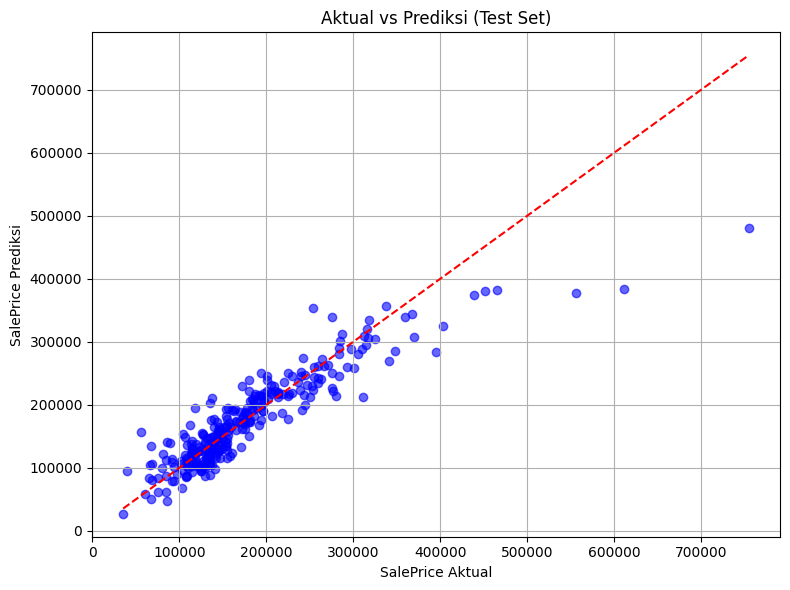

In [20]:
# 10. Visualisasi hasil prediksi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('SalePrice Aktual')
plt.ylabel('SalePrice Prediksi')
plt.title('Aktual vs Prediksi (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.savefig('regresi_prediksi_revisi.png')